In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import os
import datetime
import sklearn
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
#Settings
pd.options.display.max_columns = None
%matplotlib inline
sns.set(style="darkgrid")
random_seed = 42
chd = os.chdir('C:/Users/UvA/UvA/Sebastiaan Hemmer - DSP F4/New Data Sources/Using for prototype/Hotels/')
CURR_DIR = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [163]:
#read data
df = pd.read_excel(CURR_DIR + '\Lijst hotels MRA 2012_lastupdate 2018.xlsx', sheet_name='details')

In [88]:
df.head(1)

,nummer,hotel naam in 2012,sterklasse NHC 2012,aantal kamers in 2012,aantal bedden in 2012,aantal campeerplekken,gemeente,plaats,postcode,straat,huisnummer,buurtindeling 2005,wijk,buurtindeling 2010,stadsdeel
0,1.0,EDEN AMSTERDAM AMERICAN HOTEL,4,175,354,,AMSTERDAM,AMSTERDAM,1017PN,LEIDSEKADE,97,A07b,A,A07b,A


In [22]:
regions = pd.read_excel(CURR_DIR + '\Regions in scope.xlsx', sheet_name='Regions')

In [51]:
regions.head()

,Region Code,Region,Type,Surface Area (m^2)
0,A,A Centrum,Borough,7366810
1,B,B Westpoort,Borough,20343200
2,E,E West,Borough,10008500
3,F,F Nieuw-West,Borough,36187100
4,K,K Zuid,Borough,16592600


In [69]:
df['region'] = 'A'
df['regionname'] = 'tmp'

In [132]:
df2 = df.merge(regions, how='outer', left_on=['stadsdeel'], right_on=['Region Code'])

In [133]:
df2.Region.value_counts()

A  Centrum       248
K  Zuid           83
E  West           30
M  Oost           14
F  Nieuw-West     10
N  Noord           7
T  Zuidoost        3
B  Westpoort       3
Muiden             1
Heemstede          1
Diemen             1
Ouder-Amstel       1
Amstelveen         1
Name: Region, dtype: int64

In [135]:
df2.describe()

,nummer,sterklasse NHC 2012,aantal kamers in 2012,aantal bedden in 2012,Surface Area (m^2)
count,605.000000,606.000000,606.000000,606.000000,4.030000e+02
mean,15957.900826,3.011551,113.551155,242.528053,1.156070e+07
std,24397.739096,24.541512,1398.319930,2986.043732,7.442399e+06
min,1.000000,0.000000,2.000000,4.000000,7.366810e+06
25%,207.000000,0.000000,9.000000,20.250000,7.366810e+06
50%,734.000000,2.000000,21.000000,48.000000,7.366810e+06
75%,30170.000000,3.000000,55.000000,127.750000,1.659260e+07
max,80110.000000,605.000000,34406.000000,73486.000000,4.418700e+07


In [178]:
sumRegionRooms = df2.groupby('Region').sum()
sumRegionRooms = sumRegionRooms.filter(["Region", "aantal kamers in 2012"]) 
sumRegionRooms.reset_index(inplace=True)

In [187]:
sumRegionHotels = df2.groupby('Region').count()
sumRegionHotels = sumRegionHotels.filter(["Region", "nummer"])
sumRegionHotels.reset_index(inplace=True)

In [183]:
sumRegionBedden = df2.groupby('Region').sum()
sumRegionBedden = sumRegionBedden.filter(["Region", "aantal bedden in 2012"]) 
sumRegionBedden.reset_index(inplace=True)

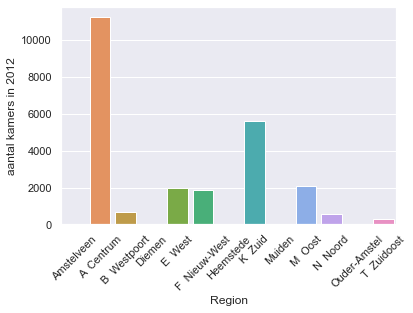

In [181]:
sns.barplot(x = 'Region',
            y = 'aantal kamers in 2012',
            data = sumRegionRooms)
plt.xticks(rotation=45)
plt.ylim
# Show the plot
plt.show()

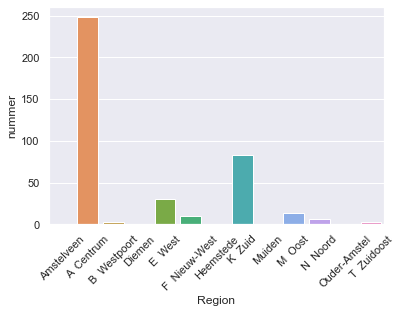

In [188]:
sns.barplot(x = 'Region',
            y = 'nummer',
            data = sumRegionHotels)
plt.xticks(rotation=45)
plt.ylim
# Show the plot
plt.show()

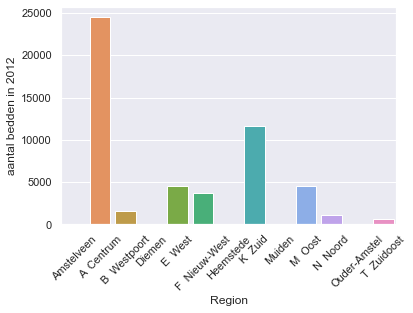

In [184]:
sns.barplot(x = 'Region',
            y = 'aantal bedden in 2012',
            data = sumRegionBedden)
plt.xticks(rotation=45)
plt.ylim
# Show the plot
plt.show()

In [ ]:
###